In [1]:
!unzip fsi_mok

Archive:  fsi_mok.zip
   creating: fsi_mok/
  inflating: __MACOSX/._fsi_mok      
  inflating: fsi_mok/ProjectParametersCSM.json  
  inflating: __MACOSX/fsi_mok/._ProjectParametersCSM.json  
  inflating: fsi_mok/ProjectParametersCoSim.json  
  inflating: __MACOSX/fsi_mok/._ProjectParametersCoSim.json  
   creating: fsi_mok/Uneeded for now/
  inflating: fsi_mok/.DS_Store       
  inflating: __MACOSX/fsi_mok/._.DS_Store  
  inflating: fsi_mok/kantesti.pkl    
  inflating: fsi_mok/StructuralMaterials.json  
  inflating: __MACOSX/fsi_mok/._StructuralMaterials.json  
   creating: fsi_mok/trainingData/
  inflating: fsi_mok/ProjectParametersCFD.json  
  inflating: __MACOSX/fsi_mok/._ProjectParametersCFD.json  
  inflating: fsi_mok/install.sh      
  inflating: __MACOSX/fsi_mok/._install.sh  
   creating: fsi_mok/ROMs/
   creating: fsi_mok/FsiROM_Kratos_patch/
  inflating: fsi_mok/FluidMaterials.json  
   creating: fsi_mok/coSimData/
   creating: fsi_mok/vtk_output_mok_fsi_cfd/
  inflating: fs

In [2]:
%cd fsi_mok

/content/fsi_mok


In [4]:
!sh install.sh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.4 MB/s eta 0:00:00
Processing ./ROM_AM
  Preparing metadata (setup.py) ... done
  Created wheel for ROM-AM: filename=ROM_AM-0.2-py3-none-any.whl size=47015 sha256=7f98dfd6f9e7898bdc20057a20538fb34f7892fb522df7783c3f9df16f3f7543
  Stored in directory: /tmp/pip-ephem-wheel-cache-7rzp8px2/wheels/9b/35/24/8b322e8891d90b28f804fe5928848cb6d2f208ee3139b8ea66
Successfully built ROM-AM


In [5]:
try:
    import google.colab  # noqa: F401
except ImportError:
    import pyvista
else:
    !wget "https://fem-on-colab.github.io/releases/vtk-install.sh" -O "/tmp/vtk-install.sh" && bash "/tmp/vtk-install.sh" > /dev/null 2>&1
    import pyvista
import panel
import pyvista
panel.extension("vtk")
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import rom_am


--2023-10-06 22:24:31--  https://fem-on-colab.github.io/releases/vtk-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1698 (1.7K) [application/x-sh]
Saving to: ‘/tmp/vtk-install.sh’

/tmp/vtk-install.sh 100%[===================>]   1.66K  --.-KB/s    in 0s      

2023-10-06 22:24:31 (29.9 MB/s) - ‘/tmp/vtk-install.sh’ saved [1698/1698]



In [7]:
!export OMP_NUM_THREADS=1
!python RomMainKratos.py

 |  /           |                  
 ' /   __| _` | __|  _ \   __|    
 . \  |   (   | |   (   |\__ \  
_|\_\_|  \__,_|\__|\___/ ____/
           Multi-Physics 9.4."0"-Release-9.4-6c68960-Release-x86_64
           Compiled for GNU/Linux and Python3.10 with GCC-10.2
Compiled with threading and MPI support.
Maximum number of threads: 2.
Running without MPI.
Importing    KratosCoSimulationApplication 
    KRATOS  / ___|___/ ___|(_)_ __ ___  _   _| | __ _| |_(_) ___  _ __
           | |   / _ \___ \| | '_ ` _ \| | | | |/ _` | __| |/ _ \| '_ \
           | |__| (_) |__) | | | | | | | |_| | | (_| | |_| | (_) | | | |
            \____\___/____/|_|_| |_| |_|\__,_|_|\__,_|\__|_|\___/|_| |_|
Initializing KratosCoSimulationApplication...
Importing    KratosFluidDynamicsApplication 
Initializing KratosFluidDynamicsApplication...
Importing    KratosMeshMovingApplication 
    KRATOS  __  __        _    __  __         _
           |  \/  |___ __| |_ |  \/  |_____ _(_)_ _  __ _
           | |\/| / -_|

In [ ]:
fluid_res = pyvista.read("./vtk_output_mok_fsi_cfd/Parts_Fluid_0_20.vtk")
panel_plotter = pyvista.Plotter(notebook=True,)
panel_plotter.add_mesh(fluid_res, scalars='VELOCITY')

panel_plotter.camera_position = 'xy'
panel_plotter._on_first_render_request()

panel.panel(
    panel_plotter.render_window, orientation_widget=panel_plotter.renderer.axes_enabled,
    enable_keybindings=False, sizing_mode="stretch_width")

#panel_plotter.show(jupyter_backend="static", return_viewer=True)

VTKRenderWindowSynchronized(vtkXOpenGLRenderWindow, color_mappers=[LinearColorMapper(id='b3d...], sizing_mode='stretch_width')

In [ ]:
fluid_res = pyvista.read("./vtk_output_mok_fsi_cfd/Parts_Fluid_0_40.vtk")
panel_plotter = pyvista.Plotter(notebook=True, off_screen=True)
panel_plotter.add_mesh(fluid_res, scalars='VELOCITY', show_edges=True,)
panel_plotter.camera_position = 'xy'
#_ = panel_plotter.add_scalar_bar()

# Open a gif
panel_plotter.open_gif("wave.gif")

pts = fluid_res.points.copy()

for i in range(1, 165):
    up_fluid_res = pyvista.read("vtk_output_mok_fsi_cfd/Parts_Fluid_0_"+str(i)+".vtk")
    up_pts = pts + up_fluid_res.point_data["MESH_DISPLACEMENT"]

    panel_plotter.update_coordinates(up_pts, render=False)
    panel_plotter.update_scalars(up_fluid_res.point_data["VELOCITY"][:, 0], render=False)

    # Write a frame. This triggers a render.
    panel_plotter.write_frame()

# Closes and finalizes movie
panel_plotter.close()

In [ ]:
#Image(open('wave.gif','rb').read())


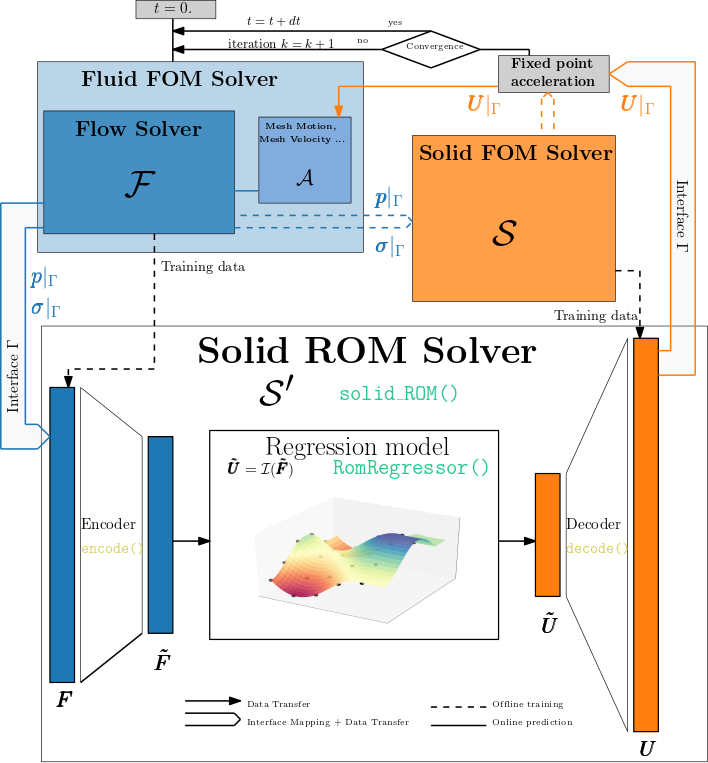

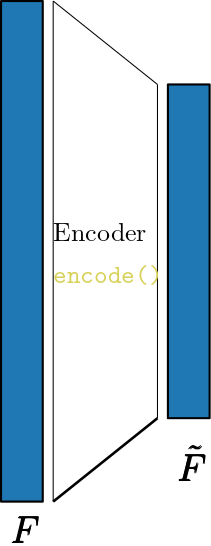

```python
class RomDimensionalityReducer:
    """Baseclass for dimensionality reduction used in the latent space

    """

    def __init__(self, latent_dim) -> None:
        self.latent_dim = latent_dim
        self._reduced_data = None
        self.map_mat = None
        self.interface_dim = None
        pass

    def train(self, data, map_used=None):
        """Training the dimensionality reducer

        Parameters
        ----------
        data  : numpy.ndarray
            Snapshot matrix of data, of (N, m) size
        map_used  : numpy.ndarray or None
            Snapshot matrix of mapping indices (from interface
            nodes to all the nodes), of (N, n) size.
            If None, no mapping is used
            Default : None

        Returns
        ------

        """
        assert (data.shape[0] >= self.latent_dim
                ), "Training data has to have a bigger dimension than the DimReducer latent dimension."
        self.high_dim = data.shape[0]
        pass

    def encode(self, new_data) -> np.ndarray:
        """Project the data instances to the latent space

        Parameters
        ----------
        new_data  : numpy.ndarray
            Snapshot matrix of data, of (N, m) size

        Returns
        ------
        latent_data  : numpy.ndarray
            Snapshot matrix of data, of (r, m) size

        """
        raise Exception('"encode" has to be implemented in the derived class!')

    def decode(self, new_latent_data, high_dim=False) -> np.ndarray:
        """Training the regressor

        Parameters
        ----------
        new_latent_data  : numpy.ndarray
            Snapshot matrix of data, of (r, m) size
        high_dim  : bool, optional
            Whether or not to override the mapping and returning the
            high dimensional space. Only considered when self.map_mat
            is not None
            Default : False

        Returns
        ------
        highDim_data  : numpy.ndarray
            Snapshot matrix of data,
            of (N, m) size
            or (n, m) is self.map_mat is not None

        """
        raise Exception('"decode" has to be implemented in the derived class!')


    @property
    def reduced_data(self):
        """Representations of the training data in the latent space

        Parameters
        ----------

        Returns
        ------
        reduced_data  : numpy.ndarray
            Matrix of data, of (r, m) size

        """
        if self._reduced_data is None:
            raise Exception(
                '"reduced_data" has to be implemented in the derived class!')
        else:
            return self._reduced_data


In [ ]:
from rom_am.dimreducers.rom_DimensionalityReducer import *
#Other necessary imports here

class MyForceReducer(RomDimensionalityReducer):

    def __init__(self, latent_dim, ) -> None:
        super().__init__(latent_dim)

        # TODO: implement additional properties
        #
        #

    def train(self, data,):

        super().train(data,)
        # TODO: implement training strategy
        #
        #

    def encode(self, new_data):

        # TODO: implement encoding function
        #
        #

        return encoded_


    def decode(self, new_data,):

        # TODO: implement decoding function
        #
        #

        return decoded_

    @property
    def reduced_data(self):
        # TODO: Returning data on the reduced space
        #
        #
        return reduced_data


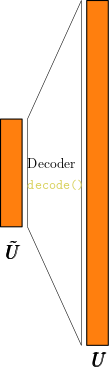

In [ ]:
#Create another class only if the decoding method used is different than the encoding method


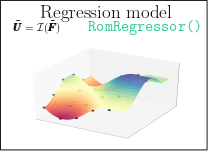

```python
class RomRegressor:
    """Baseclass for regression used in the latent space

    """

    def __init__(self) -> None:
        pass

    def train(self, input_data, output_data):
        """Training the regressor

        Parameters
        ----------
        input_data  : numpy.ndarray
            Snapshot matrix of input data, of (Nin, m) size
        output_data : numpy.ndarray
            Second Snapshot matrix data, of (Nout, m) size
            output data

        Returns
        ------

        """
        assert (input_data.shape[1] == output_data.shape[1]
                ), "Training data has to have the same number of samples in input and output."
        self.input_dim = input_data.shape[0]
        self.output_dim = output_data.shape[0]
        pass

    def predict(self, new_input,) -> np.ndarray:
        """Regressor prediction

        Parameters
        ----------
        new_input  : numpy.ndarray
            New inputs matrix, of (Nin, m) size

        Returns
        ------
        output_result : numpy.ndarray
            Solution matrix data, of (Nout, m) size

        """
        raise Exception(
            '"Predict" has to be implemented in the derived class!')


In [ ]:
from rom_am.regressors.rom_regressor import *
#Other necessary imports here

class MyRegressor(RomRegressor):

    def __init__(self,) -> None:
        super().__init__()
        # TODO: implement additional properties
        #
        #

    def train(self, input_data, output_data):
        super().train(input_data, output_data)
        # TODO: implement training strategy
        #
        #

    def predict(self, new_input):
        # TODO: Returning predicted data
        #
        #

        return predicted_


In [ ]:
from preproc import load_data
include_subiters = True
tr_load_data, tr_disp_data, test_load_data, test_disp_data, _, _, _, _ = load_data(["0.1", "0.5", "0.9"],
                                                                                   last_incr=167,
                                                                                   last_tr_incr=87,
                                                                                   start_incr=67,
                                                                                   include_subiters=include_subiters)

In [ ]:
nodeId = 20
if include_subiters:
    plt.plot(tr_load_data[nodeId, :], label = "Training Data");
    plt.plot(test_load_data[nodeId, :], label = "Test Data");
    plt.xlabel("Subiter #");
else:

    plt.plot(tr_load_data[nodeId, :], label = "Training Data");
    plt.plot(test_load_data[nodeId, :], label = "Test Data");
    plt.xlabel("Increment #");

plt.ylabel("Load [N]");
plt.title("Load History");

plt.grid();
plt.legend();
plt.tight_layout();

In [ ]:
#disp_latentDim = ?
#force_latentDim = ?

rom_model = solid_ROM()
rom_model.train(tr_load_data, tr_disp_data, norm_regr=[False, False],
                rank_pres = 20,
#                forcesReduc_model=MyForceReducer(force_latentDim),
#                regression_model=MyRegressor(),
#                dispReduc_model=MyDispReducer(disp_latentDim),
#                map_used = np.load("./coSimData/map_used.npy")
               )


In [ ]:
predicted_disp = rom_model.pred(test_load_data)

In [ ]:
fig = plt.figure(figsize = (12, 4));
abs_err = np.linalg.norm(test_disp_data - predicted_disp, axis = 0)
rel_err = abs_err / np.linalg.norm(test_disp_data, axis = 0)
plt.plot(100 * rel_err,);
plt.ylabel("Error [%]");
plt.tight_layout();
plt.grid();